# Homework 5
## Problem 1

In [109]:
# NN-Tools
import numpy as np
import keras
# Visualization
from IPython.display import SVG
from IPython.display import display
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
# Printing
from sympy import *
init_printing(use_latex=True)
# Plotting
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
# XOR data set
X = np.array([[-1,-1],[-1,1],[1,-1],[1,1]])
display(Matrix(X))
Y = np.array([0,1,1,0])
display(Matrix(Y))

⎡-1  -1⎤
⎢      ⎥
⎢-1  1 ⎥
⎢      ⎥
⎢1   -1⎥
⎢      ⎥
⎣1   1 ⎦

⎡0⎤
⎢ ⎥
⎢1⎥
⎢ ⎥
⎢1⎥
⎢ ⎥
⎣0⎦

In [84]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(2,input_dim=2,activation='relu',
    kernel_initializer='glorot_normal'))

model.add(keras.layers.Dense(2,input_dim=2,activation='relu',
    kernel_initializer='glorot_normal'))

model.add(keras.layers.Dense(1,activation='sigmoid'))

opt = keras.optimizers.Adam(lr=0.005, beta_1=0.9,
                            beta_2=0.9, epsilon=None,
                            decay=0.001, amsgrad=False)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_51 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_52 (Dense)             (None, 1)                 3         
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________
None


In [85]:
# weights
for i in model.get_weights():
    display(Matrix(i))

⎡0.49763   -0.410333⎤
⎢                   ⎥
⎣0.240382  0.245633 ⎦

⎡0.0⎤
⎢   ⎥
⎣0.0⎦

⎡ -1.1859   0.17127⎤
⎢                  ⎥
⎣-0.187273  1.19406⎦

⎡0.0⎤
⎢   ⎥
⎣0.0⎦

⎡-0.434454⎤
⎢         ⎥
⎣-1.26702 ⎦

[0.0]

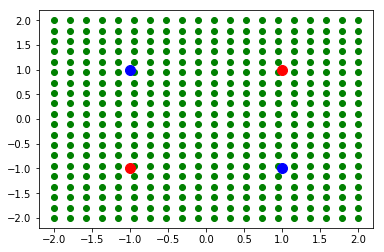

In [86]:
xpoints = np.linspace(-2,2,20)
ypoints = np.linspace(-2,2,20)
xgrid, ygrid = np.meshgrid(xpoints,ypoints)
positions = np.vstack([xgrid.ravel(),ygrid.ravel()]).T

plt.plot(positions[:,0],positions[:,1],'go')

plt.plot(X[[0,3],0],X[[0,3],1],'ro',markersize=10)

plt.plot(X[[1,2],0],X[[1,2],1],'bo',markersize=10)
plt.show()

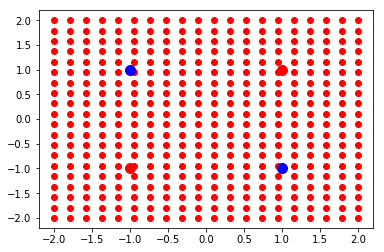

In [87]:
predictions = model.predict_classes(positions)[:,0]
zeros = positions[predictions==0,:]
ones = positions[predictions==1,:]

plt.plot(zeros[:,0],zeros[:,1],'ro')
plt.plot(ones[:,0],ones[:,1],'bo')

# Color the zero-expected outputs red
plt.plot(X[[0,3],0],X[[0,3],1],'ro',markersize=10)

# Color the one-expected outputs blue
plt.plot(X[[1,2],0],X[[1,2],1],'bo',markersize=10)

plt.show()

In [88]:
# Train/fit
history = model.fit(X, Y,
    batch_size=1,
    epochs=1000,
    verbose=0)

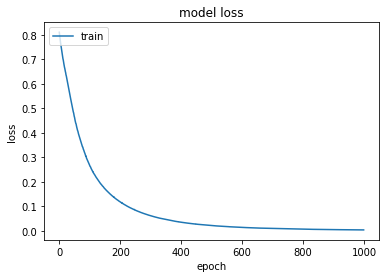

In [89]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

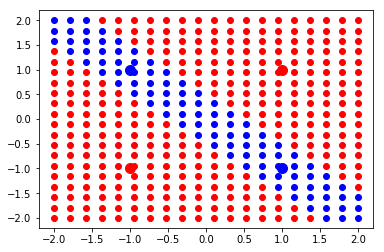

In [90]:
# Let's color those points by the classification labels...
predictions = model.predict_classes(positions)[:,0]
zeros = positions[predictions==0,:]
ones = positions[predictions==1,:]

# Color predictions by class
plt.plot(zeros[:,0],zeros[:,1],'ro')
plt.plot(ones[:,0],ones[:,1],'bo')

# Color the zero-expected outputs red
plt.plot(X[[0,3],0],X[[0,3],1],'ro',markersize=10)

# Color the one-expected outputs blue
plt.plot(X[[1,2],0],X[[1,2],1],'bo',markersize=10)
plt.show()

In [91]:
score = model.evaluate(X, Y, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 1s 129ms/step
Test loss: 0.003588759107515216
Test accuracy: 1.0


## Problem 2

#### I used the glorot_normal initializer to mimic the Xavier methode for initializing weights to help with the vanishing wieghts problem.  Then I used the decay parameter in "ADAM" though I dont think that did much.  I believe recompiling until my starting weights were close to zero had a greater impact on the net.

## Problem 3

In [102]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(2,input_dim=2,activation='relu',
    kernel_initializer='glorot_normal',bias_initializer=keras.initializers.Constant(0.1)))\

model.add(keras.layers.Dense(1,activation='sigmoid'))

opt = keras.optimizers.Adam(lr=0.005, beta_1=0.9,
                            beta_2=0.9, epsilon=None,
                            decay=0.001, amsgrad=False)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

print(model.summary())

for i in model.get_weights():
    display(Matrix(i))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_58 (Dense)             (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
None


⎡0.122627  -0.331524⎤
⎢                   ⎥
⎣0.181457  0.419053 ⎦

⎡0.1⎤
⎢   ⎥
⎣0.1⎦

⎡ 0.733268 ⎤
⎢          ⎥
⎣-0.0274127⎦

[0.0]

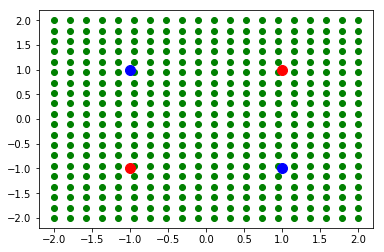

In [103]:
xpoints = np.linspace(-2,2,20)
ypoints = np.linspace(-2,2,20)
xgrid, ygrid = np.meshgrid(xpoints,ypoints)
positions = np.vstack([xgrid.ravel(),ygrid.ravel()]).T

plt.plot(positions[:,0],positions[:,1],'go')

plt.plot(X[[0,3],0],X[[0,3],1],'ro',markersize=10)

plt.plot(X[[1,2],0],X[[1,2],1],'bo',markersize=10)
plt.show()

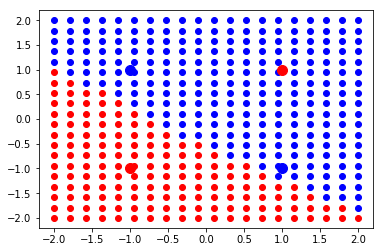

In [104]:
predictions = model.predict_classes(positions)[:,0]
zeros = positions[predictions==0,:]
ones = positions[predictions==1,:]

plt.plot(zeros[:,0],zeros[:,1],'ro')
plt.plot(ones[:,0],ones[:,1],'bo')

# Color the zero-expected outputs red
plt.plot(X[[0,3],0],X[[0,3],1],'ro',markersize=10)

# Color the one-expected outputs blue
plt.plot(X[[1,2],0],X[[1,2],1],'bo',markersize=10)

plt.show()

In [105]:
# Train/fit
history = model.fit(X, Y,
    batch_size=1,
    epochs=1000,
    verbose=0)

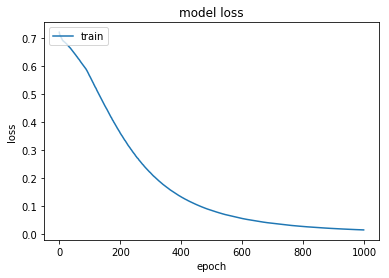

In [106]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

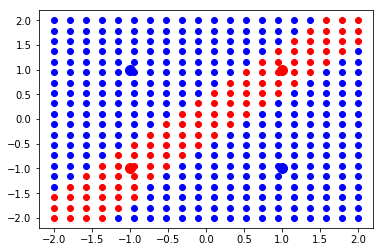

4/4 [==============================] - 1s 127ms/step
Test loss: 0.014908373355865479
Test accuracy: 1.0


In [107]:
# Let's color those points by the classification labels...
predictions = model.predict_classes(positions)[:,0]
zeros = positions[predictions==0,:]
ones = positions[predictions==1,:]

# Color predictions by class
plt.plot(zeros[:,0],zeros[:,1],'ro')
plt.plot(ones[:,0],ones[:,1],'bo')

# Color the zero-expected outputs red
plt.plot(X[[0,3],0],X[[0,3],1],'ro',markersize=10)

# Color the one-expected outputs blue
plt.plot(X[[1,2],0],X[[1,2],1],'bo',markersize=10)
plt.show()

score = model.evaluate(X, Y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

## Problem 4

#### The smallest network I could create was one hidden layer.  I ensured that the weights were initialized close to zero.  I think that by using a decay I was able to keep the network small, because previously without it my larger networks seemed to be having issues with high activation.  The steady loss curve supports this theory.

## Problem 5

In [123]:
from keras.datasets import mnist
# Digits are zero through nine, so 10 classes
num_classes = 10
# input image dimensions
img_rows, img_cols = 28, 28
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], img_rows * img_cols)
x_test = x_test.reshape(x_test.shape[0], img_rows * img_cols)
# Data normalization (0-255 is encoded as 0-1 instead)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0
# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
# Shape information
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 784)
y_train shape: (60000, 10)
60000 train samples
10000 test samples


In [198]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(512, activation='tanh',input_shape=[x_train.shape[1]],
                            kernel_initializer='glorot_normal',bias_initializer=keras.initializers.Constant(0.1)))

model.add(keras.layers.Dense(num_classes,activation='softmax',bias_initializer=keras.initializers.Constant(0.1)))

optim = keras.optimizers.Adam(lr=0.002, beta_1=0.9,
                            beta_2=0.99, epsilon=None,
                            decay=0.00, amsgrad=False)

model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer=optim,        
                metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_175 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_176 (Dense)            (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [199]:
# Train/fit
history = model.fit(x_train, y_train,
    batch_size=512,
    epochs=40,
    verbose=0,
    validation_split = 0.2)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09080768214245473
Test accuracy: 0.9812


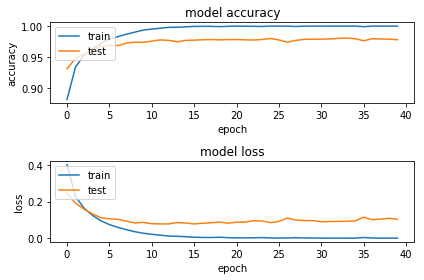

In [200]:
plt.figure()
# summarize history for accuracy
plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# summarize history for loss
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()
plt.show()

## Problem 6

In [193]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(512, activation='relu',input_shape=[x_train.shape[1]],
                            kernel_initializer='glorot_normal'))

model.add(keras.layers.Dense(num_classes,activation='softmax'))

optim = keras.optimizers.Adam(lr=0.001, beta_1=0.9,
                            beta_2=0.99, epsilon=None,
                            decay=0.00, amsgrad=True)

model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer=optim,        
                metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_173 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_174 (Dense)            (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [194]:
# Train/fit
history = model.fit(x_train, y_train,
    batch_size=512,
    epochs=40,
    verbose=0,
    validation_split = 0.2)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0647791080889263
Test accuracy: 0.9801


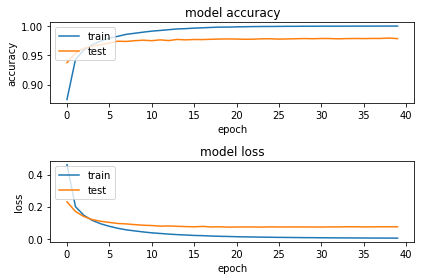

In [195]:
plt.figure()
# summarize history for accuracy
plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# summarize history for loss
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()
plt.show()

## Problem 7 
#### The Relu activation function seems to be a piece wise loss early on because of its mostly linear behavior, where the tanh function is a steady and continuous curve.